1) Work out the Neyman-Pearson detection statistic for detecting a rectangular box located at position 555, with hight 1, size 100 in white gaussian noise (np.random.normal(0,1,$10^6$))
a) Write the statistical model for the two competing hypothesis (H0, H1)
b) If a false detection costs $10^4$ dollars, but a true detection gains you a dollar, what would be the detection bar?
c) Suppose that the hight of the rectangular box is unknown, what would you do? Is the test optimal ?
d) Suppose that the noise was complex (as in complex numbers), and that the boxed signal had a uniform "hight" that is a complex number of unknown magnitude and phase. What would you do? is the test optimal?
e) Suppose that the position of the box is unknown. How would you detect it then?
How would you compute the detection statistic at all positions at once using FFT?
What would be the detection bar in this situation, for the same financial conditions as in (Q1 b)? Use monte-carlo to set the bar. What is the equivalent look-elsewhere-effect? 
f) What is the amplitude of the box such that if we "inject" a signal with this amplitude, the detection probability is 50% [what about 10%, 99%, 99.99%]
g) What would you do if the size of the box is unknown, and can take any width between 2 bins and 500 bins? Use monte-carlo to set the bar. What is the equivalent look-elsewhere-effect? 

2) You are looking for the same box as in (1), but suppose that the noise is of the following form:
n(t) = np.random.normal(0,1,$10^6$) convolved with a normalized triangular shape of width 500 [normalized such that np.linalg.norm(triangle)=1].
a) Write a statistical model for the null (H0) and the alternative hypothesis (H1) in real space what is the Neyman-Pearson detection statistic you would compute? [use matrix notation]
b) Write a statistical model for the null (H0) and the alternative hypothesis (H1)  in Fourier space. what is the Neyman-Pearson detection statistic you would compute? Is it the same statistic? Simulate a signal and compute the score in several positions, both in real space and Fourier space, make sure you get the same number up to machine precision.
c) Are you more sensitive with this noise source, or in Q1? What is the amplitude of the box such that if we "inject" a signal with this amplitude, the detection probability is 50% [what about 10%, 99%, 99.99%]?
(d) about the 50% detection amplitude as a function of the Triangle's width. Can you compute it analytically? (good approximation is OK) 

3) You are looking for the same box as in (1), but suppose that the noise is of the following form:
n(t) = np.random.normal(0,1,$10^6$) convolved with a normalized filter of width 500 and unknown shape [normalized such that np.linalg.norm(filter)=1].
a) Is it possible to obtain a good estimator of the filter? [Read about the Welch method AFTER trying to solve it yourself]
b) What is the impact of using the best-estimate filter in the detection statistic computed in (2) ? Is this hampering detection at all?
c) Suppose instead of $10^6$ samples, you have only $10^4$ samples, how does this impact the precision of estimating the filter?  Is this hampering detection at all?

4) Suppose you have the same situation as in (2), but after generating the noise, Gargamel chooses at random $10^3$ samples and zeroizes them.
a) Compute the statistic from (2) in this situation, and plot their histogram. Is that the same histogram as in (2)? Would this interfere with detection?
b) Write the time-domain statistic relevant for detecting a signal at a particular place, taking the missing data into account.

1) Work out the Neyman-Pearson detection statistic for detecting a rectangular box located at position 555, with height 1, size 100 in white gaussian noise (np.random.normal(0,1,$10^6$))

********
a) $\textbf{Write the statistical model for the two competing hypothesis (H0, H1)}$
********

we have a time series of $ N = 10^6 $ data points $ x_n, n = 0, 1, ..., N-1 $ 

the null hypothesis is that the data is white gaussian noise (WGN): $ w_n \sim N(0,1) $

the alternative hypothesis is that, in addition to WGN, the data contains a rectangular pulse of height $A$ and length $\tau$ starting at time $n_s$ (signal): $ s_n = A (\Theta[\tau + n_s - n] - \Theta[n_s - n]) \equiv A \hat{s}_n(\tau, n_s) $

where $ \Theta[j] = \sum_{k = j}^{\infty} \delta_{jk} $ is the discrete (inclusive) Heaviside step function, so we may also use the (left-inclusive) indicator function $ \mathbb{I}(j; a, b) \equiv Indicator[a \leq j < b] = \sum_{k = a}^{b-1} \delta_{j k} $ to write our unit-height pulse template:

$ \hat{s}_n(\tau, n_s) = \mathbb{I}(n; n_s, n_s + \tau) $

we first write these hypotheses as

$ H_0: x_n = w_n $

$ H_1(A, \tau, n_s): x_n = w_n + A \hat{s}_n(\tau, n_s) $

with likelihoods $ L[H|x] = P[x|H] = P[H|x] \frac{P[x]}{P[H]} $

and posterior probabilities $ P[H|x] = \frac{P[H]}{P[x]} $

since we know the noise distribution, we can compute

$ P[x|H_0] = P[w_n = x_n] = \prod_{n=0}^{N-1} \frac{e^{-\frac{x_n^2}{2}}}{\sqrt{2 \pi}} = (2 \pi)^{-\frac{N}{2}} e^{-\sum_{n=0}^{N-1} \frac{x_n^2}{2}} $

$ P[x|H_1(A, \tau, n_s)] = P[w_n = x_n - s_n] = \prod_{n=0}^{N-1} \frac{e^{-\frac{(x_n - s_n)^2}{2}}}{\sqrt{2 \pi}} = (2 \pi)^{-\frac{N}{2}} e^{-\sum_{n=0}^{N-1} \frac{(x_n - s_n)^2}{2}} $

and this gives us the likelihood ratio

$ \Lambda(A, \tau, n_s; x) \equiv \frac{P[x|H_1(A, \tau, n_s)]}{P[x|H_0]} = e^{-\frac{1}{2} \sum_{n=0}^{N-1} ((x_n - s_n)^2 - x_n^2)} = e^{\sum_{n=0}^{N-1} (x_n s_n - \frac{s_n^2}{2})} = e^{-\frac{\tau A^2}{2}} e^{A \sum_{n=0}^{N-1} x_n \hat{s}_n(\tau, n_s)} $

then we reject $H_0$ in favor of $H_1$ when

$ \Lambda(A, \tau, n_s; x) > \eta_{\Lambda} $

where the threshold (detection bar) $\eta_{\Lambda}$ is set by the requirement that

$ P[\Lambda(A, \tau, n_s; x) > \eta_{\Lambda} | H_0] = P[\Lambda(A, \tau, n_s; x_n = w_n) > \eta_{\Lambda}] = \alpha $

for our desired significance level (false detection rate) $\alpha$

the neyman-pearson lemma states that this test has the greatest power, $P[\Lambda(A, \tau, n_s; x) > \eta_{\Lambda} | H_1]$, of all statistical tests at level $\alpha$ because we are using the likelihood ratio to test a simple hypothesis (fully specified model parameters)

further, the lemma states that any monotonic function of the likelihood ratio gives a test statistic with equivalently optimal power at level $\alpha$, so we instead consider

$ \lambda(\tau, n_s; x) \equiv \frac{1}{A}(\ln \Lambda + \frac{\tau A^2}{2}) = \sum_{n=0}^{N-1} x_n \hat{s}_n(\tau, n_s) $

and we reject $H_0$ in favor of $H_1$ when

$ \lambda(\tau, n_s; x) > \eta_{\lambda}(\alpha) $

it is now straightforward to set the threshold $\eta_{\lambda}(\alpha)$ according to

$ P[\lambda(\tau, n_s; x) > \eta_{\lambda}(\alpha) | H_0] = \alpha $

because we can easily compute our test statistic under $H_0$,

$ \lambda(\tau, n_s; x_n = w_n) = \sum_{n=0}^{N - 1} w_n \hat{s}_n(\tau, n_s) = \sum_{n=n_s}^{n_s + \tau - 1} w_n $

and since $w_n$ are $i.i.d.$ standard gaussian RVs, the sum of $\tau$ such variables is also gaussian with mean zero and variance $\tau$, so

$ \frac{1}{\sqrt{\tau}} \lambda(\tau, n_s; x_n = w_n) = \frac{1}{\sqrt{\tau}} \sum_{n=n_s}^{n_s + \tau - 1} w_n \sim N(0,1) \implies $

$ P[\frac{\lambda(\tau, n_s; x)}{\sqrt{\tau}} > \frac{\eta_{\lambda}}{\sqrt{\tau}} | H_0] = 1 - \Phi(\frac{\eta_{\lambda}}{\sqrt{\tau}}) $

where $\Phi(z)$ is the standard gaussian CDF, defined in terms of the error function under mathematica conventions as

$\Phi(z) = \frac{1}{2} (1 + Erf(\frac{z}{\sqrt{2}}))$

thus we can find the threshold $\eta(\alpha)$ using our desired false alarm rate

$ \alpha = 1 - \Phi(\frac{\eta_{\lambda}}{\sqrt{\tau}}) = \frac{1}{2} (1 - Erf(\frac{\eta_{\lambda}}{\sqrt{2 \tau}})) \implies $

$ \frac{\eta_{\lambda}(\alpha)}{\sqrt{\tau}} = \sqrt{2} InverseErf(1 - 2 \alpha) $


********
b) $\textbf{If a false detection costs 10^4 dollars,}$

$\textbf{but a true detection gains you a dollar,}$

$\textbf{what would be the detection bar?}$
********

for cost $C_{FD}$ of false detection and benefit $B_{TD}$ of true detection, we set our false detection rate $ \alpha = \frac{B_{TD}}{C_{FD}} $

here we have $ \alpha = \frac{1}{10^4} \implies $

$ \frac{\eta_{\lambda}(\alpha)}{\sqrt{\tau}} = \sqrt{2} InverseErf(1 - 2*10^{-4}) = 3.71902 $

********
c) $\textbf{Suppose that the height of the rectangular box is unknown,}$

$\textbf{what would you do? Is the test optimal ?}$
********

for an unknown height A, we use the same test statistic $\lambda(\tau, n_s; x)$ from above (which does not depend on A)

it is still an optimal test because the karl-rubin theorem allows you to extend the neyman-pearson lemma from simple hypotheses to composite hypotheses in one unknown parameter (e.g., $ H_1: A > 0 $, as opposed to the simple hypothesis $ H_1: A = a $), under the conditions
(1) the likelihood ratio is monotonic non-decreasing in the data and 
(2) you use a sufficient test statistic which is a monotonic function of the likelihood ratio and independent of the unknown parameter

********
d) $\textbf{Suppose that the noise was complex (as in complex numbers),}$

$\textbf{and that the boxed signal had a uniform "height"} $

$\textbf{that is a complex number of unknown magnitude and phase.}$ 

$\textbf{What would you do? is the test optimal?}$
********

the simplest solution is to treat the real and imaginary components of our data separately, since they are completely independent, then we can use the same test described above and claim detection if either component's test statistic is above the threshold

however, since you would expect a false positive after $\frac{1}{\alpha}$ independent tests each at false positive rate $\alpha$, we should use false positive rate of approximately $\frac{\alpha}{2}$ for each test in order to preserve the overall rate of $\alpha$ after 2 tests

(more precisely, tests with false positive rates $\alpha_1$ and $\alpha_2$ combine for an overall false positive rate of $ \alpha = 1 - (1-\alpha_1)(1-\alpha_2) = \alpha_1 + \alpha_2 - \alpha_1 \alpha_2 $)

but the Neyman-Pearson lemma and Karlin-Rubin theorem don't guarantee that the overall test is uniformly most powerful for the two-parameter family of tests -- and in fact, it is NOT AN OPTIMAL TEST because a more powerful test can be found by revisiting the problem more carefully as follows: 

now we have complex WGN $ w_n \sim CN(0,2) \implies \Re(w_n), \Im(w_n) \sim N(0, 1)$

and we search for the complex signal $ s_n = A e^{i \phi} \hat{s}_n(\tau, n_s) $

using the hypotheses

$ H_0: x_n = w_n $

$ H_1(A, \phi, \tau, n_s): x_n = w_n + A e^{i \phi} \hat{s}_n(\tau, n_s) $

this gives us likelihood functions from the PDF of a circularly symmetric complex gaussian (variance = 2 from unit variance of i.i.d. real and imaginary parts)

$ P[x_n | H_0] = P[w_n = x_n] = \prod_n \frac{e^{-\frac{|x_n|^2}{2}}}{2 \pi} $

$ P[x_n | H_1(A, \phi, \tau, n_s)] = P[w_n = x_n - s_n] = \prod_n \frac{e^{-\frac{|x_n - s_n(A, \phi, \tau, n_s)|^2)}{2}}}{2 \pi} $

$ \implies $

$ \Lambda(A, \phi, \tau, n_s; x) = \frac{P[x_n | H_1(A, \phi, \tau, n_s)]}{P[x_n | H_0]} = e^{\sum_n \frac{|x_n|^2 - |x_n - s_n|^2}{2}} = e^{\sum_n (\Re(s_n^{*} x_n) - \frac{|s_n|^2}{2})} =  e^{-\frac{\tau A^2}{2}} e^{A \Re(e^{-i \phi} \sum_n x_n \hat{s}_n)} $

now define the complex statistic $ z(\tau, n_s; x) \equiv \sum_n x_n \hat{s}_n(\tau, n_s) = \sum_{n = n_s}^{n_s + \tau - 1} x_n $

which gives us $ \Lambda(A, \phi, \tau, n_s; x) = e^{-\frac{\tau A^2}{2}} e^{A \Re(e^{-i \phi} z(\tau, n_s; x))} = e^{-\frac{\tau A^2}{2}} e^{A |z| cos(arg(z) - \phi)} $

since the noise is circularly symmetric, it treats all pulse phases equally, so we marginalize over the phase $\phi$ (using a uniform distribution from $0$ to $2 \pi$ as its prior) to get 

$ \Lambda(A, \tau, n_s; x) = e^{-\frac{\tau A^2}{2}} \int_0^{2 \pi} \frac{d\phi}{2 \pi} e^{A |z| cos(arg(z) - \phi)} = e^{-\frac{\tau A^2}{2}} I_0(A |z(\tau, n_s; x)|) $

where $ I_0(y) = \sum_{k = 0}^{\infty} \frac{(\frac{y^2}{4})^k}{(k!)^2} $ is the $0^{th}$-order modified bessel function of the $1^{st}$ kind

noting that $e^{A^2 |z|^2}$ is an upper envelope of $I_0(A |z|)$, we see $\frac{e^{A^2 |z|^2}}{I_0(A |z|)}$ is monotonic non-decreasing in $|z| > 0$, and since the likelihood ratio is again monotonic non-decreasing in the data we can define

$ \lambda(\tau, n_s; x) \equiv \frac{1}{A^2}(\ln(\frac{e^{A^2 |z|^2}}{I_0(A |z|)} \Lambda(A, \tau, n_s; x)) + \frac{\tau A^2}{2}) = |z(\tau, n_s; x)|^2 $

to be our test statistic that is optimal according to neyman-pearson and karl-rubin

that is, our test rejects $H_0$ in favor of $H_1$ when $ \lambda(\tau, n_s; x) > \eta_{\lambda} $, and choosing $\eta_{\lambda}$ such that $ P[\lambda(\tau, n_s; x) > \eta_{\lambda}(\alpha) | H_0] = \alpha $ gives us the most powerful test at significance level $\alpha$ (following the neyman-pearson lemma and karl-rubin theorem)

finally, it is straightforward to determine $\eta_{\lambda}(\alpha)$ because we have

$ \lambda(\tau, n_s; x) = |z(\tau, n_s; x)|^2 = |\sum_n x_n \hat{s}_n(\tau, n_s)|^2 $

$ \implies \frac{1}{\tau} \lambda(\tau, n_s; x) = \frac{|z|^2}{\tau} = (\frac{\Re(z)}{\sqrt{\tau}})^2 + (\frac{\Im(z)}{\sqrt{\tau}})^2 $

then defining $ z_0(\tau, n_s) \equiv z(\tau, n_s; x_n = w_n) $ to be the complex statistic $z(\tau, n_s; x)$ under $H_0$ we have 

$ z_0(\tau, n_s) = \sum_{n = n_s}^{n_s + \tau - 1} w_n \sim CN(0,2 \tau) \implies \Re(z_0), \Im(z_0) \sim N(0, \tau) $

$ \implies \frac{\Re(z_0)}{\sqrt{\tau}}, \frac{\Im(z_0)}{\sqrt{\tau}} \sim N(0, 1) $

and therefore under the null hypothesis $H_0$ we have

$ \frac{1}{\tau} \lambda(\tau, n_s; x_n = w_n) = \frac{|z_0|^2}{\tau} = (\frac{\Re(z_0)}{\sqrt{\tau}})^2 + (\frac{\Im(z_0)}{\sqrt{\tau}})^2 \sim \chi^2(2) $

where $\chi^2(k)$ is the chi-squared distribution with $k$ degrees of freedom, obtained from summing the squares of $k$ standard gaussian RVs, which has a particularly simple CDF for $k = 2$:

$ F_{\chi^2(2)}(y) = 1 - e^{-\frac{y}{2}} \implies F_{\chi^2(2)}^{-1}(p) = -2 \ln(1 - p) $

thus we get

$ P[\frac{\lambda(\tau, n_s; x)}{\tau} > \frac{\eta_{\lambda}(\alpha)}{\tau} | H_0] = P[\chi^2(2) > \frac{\eta_{\lambda}(\alpha)}{\tau}] = 1 - F_{\chi^2(2)}(\frac{\eta_{\lambda}(\alpha)}{\tau}) = \alpha \implies $

$ \frac{\eta_{\lambda}(\alpha)}{\tau} = F_{\chi^2(2)}^{-1}(1 - \alpha) = -2 \ln(\alpha) $

so

$ \frac{\eta_{\lambda}(\alpha = 10^{-4})}{\tau} = 8 \ln(10) = 18.4207 $


********
e) $\textbf{Suppose that the position of the box is unknown. How would you detect it then?}$

$\textbf{How would you compute the detection statistic at all positions at once using FFT?}$

$\textbf{What would be the detection bar in this situation, for the same financial conditions as in (Q1 b)?}$

$\textbf{Use monte-carlo to set the bar. What is the equivalent look-elsewhere-effect? }$
********

similar to the phase of the pulse, the noise treats all pulse starting times $n_s$ equally and the prior distribution can be taken to be uniform over all possible start times (which in the context of $H_1$ means that $ n_s = 0, 1, ..., N-1 $ all have probability $\frac{1}{N}$), so we could marginalize the likelihood ratio over $n_s$ to get

$ \Lambda(A, \tau; x) = e^{-\frac{\tau A^2}{2}} \sum_{n_s = 0}^{N - 1} \frac{I_0(A |z(\tau, n_s; x)|)}{N} $

however, the structure of this sum does not admit an analytic procedure for obtaining a test statistic that is independent of the pulse amplitude $A$, so if we want to keep our hypothesis test agnostic with respect to $A$ we must adopt another approach

the standard approach to circumventing the marginalization of the likelihood ratio is to maximize the likelihood ratio over the variable to be marginalized, and since the same $n_s$ that maximizes $\Lambda(A, \tau, n_s; x)$ will maximize a monotonic function of this unmarginalized likelihood ratio, we can simply use

$ \lambda(\tau; x) \equiv max_{n_s} \lambda(\tau, n_s; x) = max_{n_s} |z(\tau, n_s; x)|^2 $

as our test statistic, and our new test rejects $H_0$ in favor of $H_1$ when $ \lambda(\tau; x) > \eta_{\lambda} $, with $\eta_{\lambda}(\alpha)$ such that $ P[\lambda(\tau; x) > \eta_{\lambda}(\alpha) | H_0] = \alpha $

this raises two practical computation questions, because we have to compute $z(\tau, n_s; x)$ for every value of $n_s$ to get $ \lambda(\tau; x) = max_{n_s} |z|^2 $, and we have to find the distribution of $\lambda(\tau; x)$ under the null hypothesis $H_0$ to get $\eta_{\lambda}(\alpha)$

the first question can be addressed by noting that 

$ z(\tau, n_s; x) = \sum_n x_n \hat{s}_n(\tau, n_s) = \sum_n x_n \hat{s}_{n_s - n}(\tau) $

is in fact the discrete convolution of the data $x_n$ with the shifted and reversed unit pulse $\hat{s}_{(n_s - n) \rightarrow n}(\tau) = \mathbb{I}(n; -\tau, 0) $ whose $\textit{right}$ edge is now at $n = -1$

since the fourier transform of a convolution is the product of the individual fourier transforms, we can write this as 

$ z(\tau, n_s; x) = F^{-1}[F[x_n]_k F[\hat{s}_{(n_s - n) \rightarrow n}(\tau)]_k]_{n_s} $

where the discrete fourier transform $F[y_n]_k$ and its inverse $F^{-1}[\tilde{y}_k]_n$ can be computed efficiently using an fft algorithm

the only issue is that we need to decide how to extend our domain outside $ 0 \leq n < N $ for the edge cases where $ -\tau < n_s < 0 $ or $ N - \tau < n_s < N $, which is immediately obvious from the fourier transform description because the only nonzero values of $\hat{s}_{(n_s - n) \rightarrow n}(\tau)$ are for $ -\tau \leq n < 0 $

ERROR: apparently, to make the indices match up it should be that $\hat{s}_{(n_s - n) \rightarrow n}(\tau)$ has its nonzero values for $ -\tau < n \leq 0 $, because the substitution $ (n_s - n) \rightarrow n $ works differently in the heaviside step function representation than it does in the indicator function representation, and the DFT uses the latter while I was using the former --> I will not adjust this for question 1 because of the translation invariance of the test statistic (which takes maximum over $n_s$), but for later questions this will be relevant

we could deal with this in two ways:
(1) make the index wraps around (periodic summation) so that $f_n \equiv f_{n \, mod \, N}$, or (2) add $\tau$ zeros to each end of the data and use a vector of size $N + 2 \tau$ to represent the templates $\hat{s}_n(\tau, -\tau < n_s < N)$ over indices $ -\tau \leq n < N + \tau $

although (2) is the more physical solution, given the artificial nature of the problem we will use method (1), which is more computationally convenient

thus, we have an efficient way to compute $z(\tau, n_s; x)$ for all $n_s$, and now we address the question of finding the distribution of our test statistic under the null hypothesis $H_0$,

$ \lambda(\tau; x_n = w_n) = max_{n_s} |z_0(\tau, n_s)|^2 $

so that we can choose $\eta_{\lambda}(\alpha)$ such that $ P[\lambda(\tau; x_n = w_n) > \eta_{\lambda}(\alpha)] = \alpha $

if we had $ \tau = 1 $, then $z_0(\tau, n_s)$ would be independent for different values of $n_s$, and we could think of maximizing over all $N$ values of $n_s$ like doing $N$ independent tests of the same hypothesis

as noted earlier, when you do $N$ independent trials of the same test, you expect that events of probability $\frac{1}{N}$ might occur, so if you want an overall false alarm rate $\alpha$ to be preserved, you should set the detection bar such that the false alarm rate for each individual test is $ \alpha LEF(N) \approx \frac{\alpha}{N} $, where the factor $LEF(N)$ accounts for this so-called "look-elsewhere effect"

to find $LEF(N)$ for our case, in which the $N$ tests are highly correlated, we will use monte carlo simulation to empirically build the distribution of $\lambda(\tau; x_n = w_n)$ by storing its values for a large number $N_{mc}$ of WGN data realizations, then we will set the detection bar $\eta_{\lambda}(\alpha)$ to be the boundary of the $(1 - \alpha)$-quantile in our set of $N_{mc}$ sampled values of $\lambda(\tau; x_n = w_n)$

to obtain an acceptable approximation of the $(1 - \alpha)$-quantile, we will take $ N_{mc} = \frac{10}{\alpha} $, and once we have $\eta_{\lambda}(\alpha)$ we can get the false alarm rate $ \alpha' = 1 - F_{\chi^2(2)}(\frac{\eta_{\lambda}(\alpha)}{\tau}) = e^{-\frac{\eta_{\lambda}(\alpha)}{2 \tau}} $ that would be achieved by using this detection bar as the threshold for testing a single value of $n_s$, which gives us

$ LEF(N) = \frac{\alpha'}{\alpha} $

or we could say that the effective number of independent tests we are doing is

$ NIT_{eff} =  \frac{\alpha}{\alpha'} = \frac{1}{LEF(N)} $

In [1]:
import numpy as np
import numba
from numba import jit
import matplotlib.pyplot as plt

@numba.vectorize([numba.float64(numba.complex128),numba.float32(numba.complex64)])
def abs2(x):
    return x.real**2 + x.imag**2

# monte carlo sampling of tests statistics under null hypothesis
#@jit(nopython=True)
def get_stats(N=1000000, tau=100, alpha=0.0001, nsamples=100000):
    ft_signal = np.fft.fft(np.concatenate([np.zeros(N-tau), np.ones(tau)]))
    stats = np.empty(nsamples)
    for i in np.arange(nsamples):
        stats[i] = max(abs2(np.fft.ifft(ft_signal * \
                                        np.fft.fft(np.random.normal(0, 1, N) + \
                                                   1j*np.random.normal(0, 1, N)))))
    return stats

# plot histogram of monte carlo samples 
def mc_hist(stats, N=1000000, tau=100, alpha=0.0001, nsamples=100000):
    plt.hist(stats, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.xlabel('max|z_0|^2')
    plt.ylabel('count')
    plt.title(str(nsamples) + ' MC samples with N=' + str(N) + \
              ', tau=' + str(tau) + ', alpha=' + str(alpha))
    plt.show(block=False)
    return

# get monte carlo samples of test statistics from file and analyze
def get_stats_file(filename, N=1000000, tau=100, alpha=0.0001):
    stats = np.genfromtxt(filename, delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    alpha_prime = np.exp(-bar / float(2*tau))
    lef_N = alpha_prime / alpha
    Nmc = np.size(stats)
    print(str(Nmc), ' samples of N=', str(N), ', tau=', str(tau), ', alpha=', \
          str(alpha), '\n[bar, alpha_prime, lef_N] = \n', [bar, alpha_prime, lef_N])
    mc_hist(stats, N=N, tau=tau, alpha=alpha, nsamples=Nmc)
    return stats

N = 10**6
tau = 100
alpha = 10**(-4)
nsamples = int(10/alpha)

for N= 1000000 , tau= 100 , alpha= 0.0001 
get [bar, alpha_prime, lef_N] = 
 [3746.4233708712, 7.323944013933129e-09, 7.323944013933128e-05]


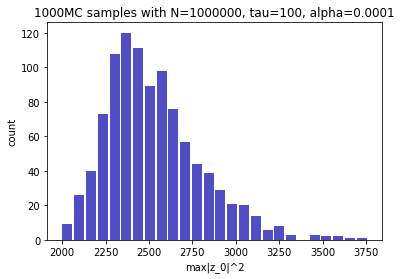

In [37]:
# get stats (will take a very long time for large N, nsamples)
stats = get_stats(N=N, tau=tau, alpha=alpha, nsamples=nsamples)
np.savetxt('h0stats.csv', stats, delimiter=',') # in case we want to revisit
bar = np.quantile(stats, 1 - alpha)
alpha_prime = np.exp(-bar / float(2*tau))
lef_N = alpha_prime / alpha
print(str(nsamples), ' samples of N=', str(N), ', tau=', str(tau), ', alpha=', \
      str(alpha), '\n[bar, alpha_prime, lef_N] = \n', [bar, alpha_prime, lef_N])
mc_hist(stats, N=N, tau=tau, alpha=alpha, nsamples=nsamples)

In [4]:
# check tau = 1 to see if LEF(N) is approximately 1/N
stats1e4 = get_stats(N=10000, tau=1, alpha=alpha, nsamples=100000)

In [6]:
# tau=1 for N = 10^4
bar1e4 = np.quantile(stats1e4, 1 - alpha)
alp1e4 = np.exp(-bar1e4 / 2.0)
lef1e4 = alp1e4 / alpha
print(str(100000), ' samples of N=', str(10000), ', tau=', str(1), ', alpha=', \
      str(alpha), '\n[bar, alpha_prime, lef_N] = \n', [bar1e4, alp1e4, lef1e4])

100000  samples of N= 10000 , tau= 1 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [36.30568416775723, 1.3071362297383666e-08, 0.00013071362297383665]


In [8]:
# tau=1 for N = 10^5
stats1e5 = np.zeros(nsamples)
for i in np.arange(nsamples):
    stats1e5[i] = max(abs2(np.random.normal(0, 1, 100000) + \
                           1j*np.random.normal(0, 1, 100000)))

In [9]:
# seems to be scaling about as expected for the genuinely independent tau=1 case
bar1e5 = np.quantile(stats1e5, 1 - alpha)
alp1e5 = np.exp(-bar1e5 / 2.0)
lef1e5 = alp1e5 / alpha
print(str(100000), ' samples of N=', str(100000), ', tau=', str(1), ', alpha=', \
      str(alpha), '\n[bar, alpha_prime, lef_N] = \n', [bar1e5, alp1e5, lef1e5])

100000  samples of N= 100000 , tau= 1 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [41.0462995098134, 1.2215445493131887e-09, 1.2215445493131887e-05]


In [ ]:
# this takes too long (even for tau=1), problem should not have used N = 10^6  :(
stats1e6 = np.empty(nsamples)
for i in np.arange(nsamples):
    stats1e6[i] = max(abs2(np.random.normal(0, 1, 1000000) + \
                           1j*np.random.normal(0, 1, 1000000)))

100000  samples of N= 1000000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [4297.731706898745, 4.651512313561326e-10, 4.651512313561326e-06]


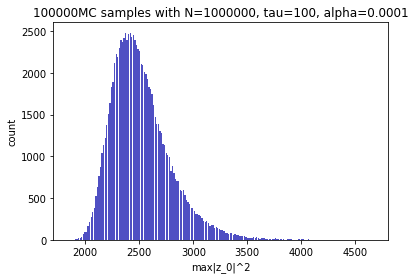

In [40]:
# or if we already wrote stats by sending this long arduous computing to a cluster...
s10e6t100 = get_stats_file('max10e6t100_stats.csv', N=1000000, tau=100, alpha=alpha)

100000  samples of N= 500000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [4323.503572272984, 4.089133414768783e-10, 4.089133414768783e-06]


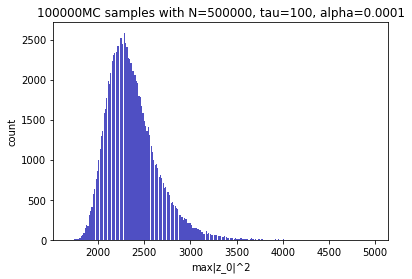

In [41]:
s5x10e5t100 = get_stats_file('max5x10e5t100_stats.csv', N=500000, tau=100, alpha=alpha)

100000  samples of N= 100000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [3781.8736730662163, 6.134309197725981e-09, 6.13430919772598e-05]


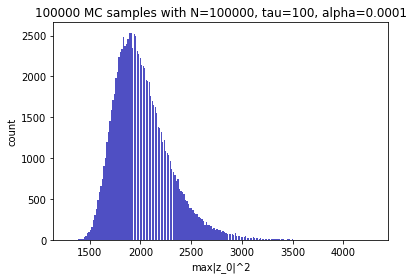

In [43]:
s10e5t100 = get_stats_file('max10e5t100_stats.csv', N=100000, tau=100, alpha=alpha)

100000  samples of N= 50000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [3695.9205779963218, 9.427801654793972e-09, 9.427801654793972e-05]


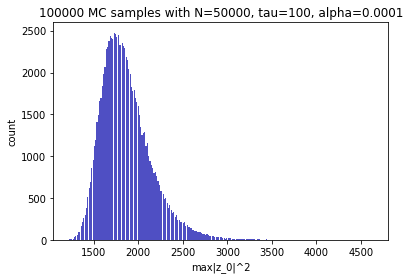

In [44]:
s5x10e4t100 = get_stats_file('max5x10e4t100_stats.csv', N=50000, tau=100, alpha=alpha)

100000  samples of N= 10000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [3372.0513722632636, 4.7608388544162754e-08, 0.00047608388544162755]


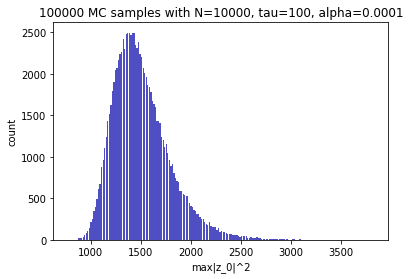

In [45]:
s10e4t100 = get_stats_file('max10e4t100_stats.csv', N=10000, tau=100, alpha=alpha)

1000000  samples of N= 100000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [3859.8521238956787, 4.153723735013579e-09, 4.153723735013579e-05]


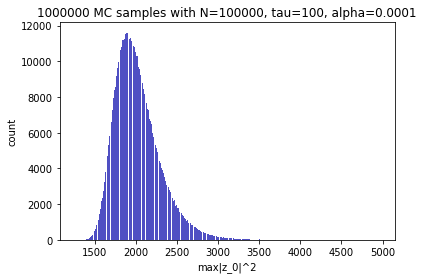

In [238]:
# lets do this with 100/alpha samples for better stats
more_s10e5t100 = get_stats_file('max10e5t100_stats_1M.csv', \
                                N=100000, tau=100, alpha=alpha)

1000000  samples of N= 100000 , tau= 100 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [4315.368374732655, 4.2588921010332785e-10, 4.258892101033278e-06]


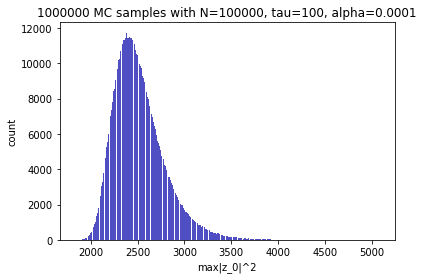

In [239]:
# and for 10^6 samples of N = 10^6, courtesy of feynman cluster
more_s10e6t100 = get_stats_file('max10e6t100_stats_1M.csv', \
                                N=100000, tau=100, alpha=alpha)

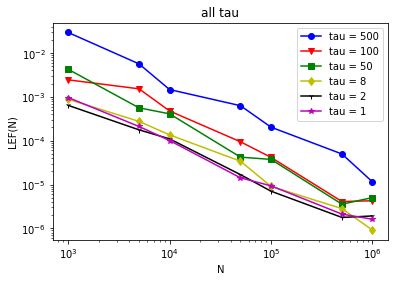

In [240]:
# and let's take a more systematic look at the look-elsewhere effect
# as a function of sample size N and template width tau
n1 = []
lef1 = []
n2 = []
lef2 = []
n8 = []
lef8 = []
n50 = []
lef50 = []
n100 = []
lef100 = []
n500 = []
lef500 = []
kw1 = [{'N' : 1000, 'tau' : 1, 'outname' : 'max1te3_stats.csv'}, \
       {'N' : 5000, 'tau' : 1, 'outname' : 'max1t5e3_stats.csv'}, \
       {'N' : 10000, 'tau' : 1, 'outname' : 'max1te4_stats.csv'}, \
       {'N' : 50000, 'tau' : 1, 'outname' : 'max1t5e4_stats.csv'}, \
       {'N' : 100000, 'tau' : 1, 'outname' : 'max1te5_stats.csv'}, \
       {'N' : 500000, 'tau' : 1, 'outname' : 'max1t5e5_stats.csv'}, \
       {'N' : 1000000, 'tau' : 1, 'outname' : 'max1te6_stats.csv'}]
kw2 = [{'N' : 1000, 'tau' : 2, 'outname' : 'max2te3_stats.csv'}, \
       {'N' : 5000, 'tau' : 2, 'outname' : 'max2t5e3_stats.csv'}, \
       {'N' : 10000, 'tau' : 2, 'outname' : 'max2te4_stats.csv'}, \
       {'N' : 50000, 'tau' : 2, 'outname' : 'max2t5e4_stats.csv'}, \
       {'N' : 100000, 'tau' : 2, 'outname' : 'max2te5_stats.csv'}, \
       {'N' : 500000, 'tau' : 2, 'outname' : 'max2t5e5_stats.csv'}, \
       {'N' : 1000000, 'tau' : 2, 'outname' : 'max2te6_stats.csv'}]
kw8 = [{'N' : 1000, 'tau' : 8, 'outname' : 'max8te3_stats.csv'}, \
       {'N' : 5000, 'tau' : 8, 'outname' : 'max8t5e3_stats.csv'}, \
       {'N' : 10000, 'tau' : 8, 'outname' : 'max8te4_stats.csv'}, \
       {'N' : 50000, 'tau' : 8, 'outname' : 'max8t5e4_stats.csv'}, \
       {'N' : 100000, 'tau' : 8, 'outname' : 'max8te5_stats.csv'}, \
       {'N' : 500000, 'tau' : 8, 'outname' : 'max8t5e5_stats.csv'}, \
       {'N' : 1000000, 'tau' : 8, 'outname' : 'max8te6_stats.csv'}]
kw50 = [{'N' : 1000, 'tau' : 50, 'outname' : 'max10e3t50_stats.csv'}, \
        {'N' : 5000, 'tau' : 50, 'outname' : 'max5x10e3t50_stats.csv'}, \
        {'N' : 10000, 'tau' : 50, 'outname' : 'max10e4t50_stats.csv'}, \
        {'N' : 50000, 'tau' : 50, 'outname' : 'max5x10e4t50_stats.csv'}, \
        {'N' : 100000, 'tau' : 50, 'outname' : 'max10e5t50_stats.csv'}, \
        {'N' : 500000, 'tau' : 50, 'outname' : 'max5x10e5t50_stats.csv'}, \
        {'N' : 1000000, 'tau' : 50, 'outname' : 'max10e6t50_stats.csv'}]
kw100 = [{'N' : 1000, 'tau' : 100, 'outname' : 'max10e3t100_stats.csv'}, \
         {'N' : 5000, 'tau' : 100, 'outname' : 'max5x10e3t100_stats.csv'}, \
         {'N' : 10000, 'tau' : 100, 'outname' : 'max10e4t100_stats.csv'}, \
         {'N' : 50000, 'tau' : 100, 'outname' : 'max5x10e4t100_stats.csv'}, \
         {'N' : 100000, 'tau' : 100, 'outname' : 'max10e5t100_stats_1M.csv'}, \
         {'N' : 500000, 'tau' : 100, 'outname' : 'max5x10e5t100_stats.csv'}, \
         {'N' : 1000000, 'tau' : 100, 'outname' : 'max10e6t100_stats_1M.csv'}]
kw500 = [{'N' : 1000, 'tau' : 500, 'outname' : 'max10e3t500_stats.csv'}, \
         {'N' : 5000, 'tau' : 500, 'outname' : 'max5x10e3t500_stats.csv'}, \
         {'N' : 10000, 'tau' : 500, 'outname' : 'max10e4t500_stats.csv'}, \
         {'N' : 50000, 'tau' : 500, 'outname' : 'max5x10e4t500_stats.csv'}, \
         {'N' : 100000, 'tau' : 500, 'outname' : 'max10e5t500_stats.csv'}, \
         {'N' : 500000, 'tau' : 500, 'outname' : 'max5x10e5t500_stats.csv'}, \
         {'N' : 1000000, 'tau' : 500, 'outname' : 'max10e6t500_stats.csv'}]

for kw in kw1:
    n1.append(kw['N'])
    stats = np.genfromtxt(kw['outname'], delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    lef1.append(np.exp(-bar / 2.0) / alpha)
for kw in kw2:
    n2.append(kw['N'])
    stats = np.genfromtxt(kw['outname'], delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    lef2.append(np.exp(-bar / 4.0) / alpha)
for kw in kw8:
    n8.append(kw['N'])
    stats = np.genfromtxt(kw['outname'], delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    lef8.append(np.exp(-bar / 16.0) / alpha)
for kw in kw50:
    n50.append(kw['N'])
    stats = np.genfromtxt(kw['outname'], delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    lef50.append(np.exp(-bar / 100.0) / alpha)
for kw in kw100:
    n100.append(kw['N'])
    stats = np.genfromtxt(kw['outname'], delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    lef100.append(np.exp(-bar / 200.0) / alpha)
for kw in kw500:
    n500.append(kw['N'])
    stats = np.genfromtxt(kw['outname'], delimiter=',')
    bar = np.quantile(stats, 1 - alpha)
    lef500.append(np.exp(-bar / 1000.0) / alpha)
    
plt.figure(555)
plt.loglog(n500, lef500, marker='o', color='b')
plt.loglog(n100, lef100, marker='v', color='r')
plt.loglog(n50, lef50, marker='s', color='g')
plt.loglog(n8, lef8, marker='d', color='y')
plt.loglog(n2, lef2, marker='1', color='k')
plt.loglog(n1, lef1, marker='*', color='m')
plt.legend(['tau = 500','tau = 100','tau = 50','tau = 8','tau = 2','tau = 1'])
plt.xlabel('N')
plt.ylabel('LEF(N)')
plt.title('all tau')
plt.show(block=False)

if appears that for $\tau = 100$ the effective number of independent samples is roughly between $\frac{N}{5}$ and $\frac{N}{4}$ when we search for the pulse at all $N = 10^5$ or $10^6$ starting positions 

********
f) $\textbf{What is the amplitude of the box such that if we "inject" a signal with this amplitude,}$

$\textbf{the detection probability is .5? (what about .1, .99, .9999?)}$
********

the detection probability for an injection $ s_n(A_I, \phi_I, \tau_I, n_{sI}) $ is given by

$ \Pi(A_I, \phi_I, \tau_I, n_{sI}) \equiv P[\lambda(\tau; x_n = w_n + s_n(A_I, \phi_I, \tau_I, n_{sI})) > \eta_{\lambda}(\alpha)] = $

$ P[max_{n_s} | \sum_n \hat{s}_n(\tau, n_s) (w_n + A_I e^{i \phi_I} \hat{s}_n(\tau_I, n_{sI}))|^2 > \eta] = $

$ P[max_{n_s} |z_0(\tau, n_s) + A_I e^{i \phi_I} \sum_n \hat{s}_n(\tau, n_s) \hat{s}_n(\tau_I, n_{sI})|^2 > \eta] = $

$ P[max_{n_s} (|z_0(\tau, n_s)|^2 + 2 A_I \sigma(\tau, n_s; \tau_I, n_{sI}) \Re(e^{-i \phi_I} z_0(\tau, n_s)) + A_I^2 \sigma(\tau, n_s; \tau_I, n_{sI})^2) > \eta] $

where 

$ \sigma(\tau, n_s; \tau_I, n_{sI}) \equiv \sum_n \hat{s}_n(\tau, n_s) \hat{s}_n(\tau_I, n_{sI}) = \sum_n \mathbb{I}(n; n_s, n_s + \tau) \mathbb{I}(n; n_{sI}, n_{sI} + \tau_I) $

defining $ \tau_{min} \equiv min(\tau, \tau_I) $ and $ \Delta \tau \equiv |\tau - \tau_I| $, we see that $\sigma(\tau, n_s; \tau_I, n_{sI})$ is a trapezoidal pulse (in $n_s$) which is zero for $ n_s \leq n_{sI} - \tau $, then, starting from unit height at $ n_s = n_{sI} - (\tau - 1) $, it rises with unit slope until it reaches its maximal height $\tau_{min}$ at $ n_s =  n_{sI} - \tau + \tau_{min} = n_{sI} - max(0, \tau - \tau_I) $, and it remains at its maximal height for a total of $ \Delta \tau + 1 $ points up to and including $ n_s = n_{sI} - \tau + \tau_{min} + \Delta \tau = n_{sI} + max(0, \tau_I - \tau) $, after which it decreases with unit slope until it again reaches unit height at $ n_s = n_{sI} + (\tau_I - 1) $ and then returns to zero for $ n_s \geq n_{sI} + \tau_I $


now to find $\Pi(A_I, \phi_I, \tau_I, n_{sI})$ as a function of $A_I$ we will use the following monte carlo procedure:

select some uniformly discretized interval $ \lbrace A_{Imin}, 2 A_{Imin}, 3 A_{Imin}, ..., A_{Imax} \rbrace $ such that $ \Pi(A_{Imin}) \approx \Pi(0) = \alpha $ and $ \Pi(A_{Imax}) \approx \Pi(\infty) = 1 $

generate some large number $N_{mc}$ of WGN realizations, and for each value of $A_I$ count how many of those noise realizations result in a test statistic that passes the detection bar

dividing these counts by $ N_{mc} $ gives $ \Pi(A_{I}) $ for each amplitude in our discretized interval, from which we can interpolate the power function $\Pi(A_I, \phi_I, \tau_I, n_{sI})$ over its continuum domain $ A_I \geq 0 $

a computationally efficient method for doing this is to iterate over the $N_{mc}$ noise realizations just once, and for each WGN sample start at $A_{Imin}$ and compute the test statistic of each successive $A_I$ in the discretized interval until reaching the first amplitude $A_{Ibar}$ that passes the bar, then increment the counts of all $ A_I \geq A_{Ibar} $ and move on to the next noise sample

the final detail to be addressed is how to select the other injection parameters $(\phi_I, \tau_I, n_{sI})$

the choice of $\tau_I$ is really a matter of what the question is asking for, and since the question doesn't clarify this point, it's natural to assume that it means for the injected signal to have the same shape as the template, so we will take $\tau_I = \tau$, which makes $\sigma(\tau, n_s; \tau_I=\tau, n_{sI})$ a triangular pulse (i.e., the top of the trapezoid includes only one point) with peak height $\tau$ at $ n_s = n_{sI} $ and unit height endpoints at $ n_s = n_{sI} \pm (\tau - 1) $

the choice of injection phase is arbitrary since the noise is circularly symmetric, so simply selecting the convenient phase $ \phi_I = 0 $ is equivalent to drawing it at random for each noise sample

the choice of start time could have some effect in the physical case where we allowed the pulse to extend off the ends of the time series, but under our periodic boundaries the choice of injection start time is as inconsequential as the phase, so instead of drawing it at random for each sample we will simply use $ n_{sI} = \frac{N}{2} $   

now letting $ s_n(A_I) \equiv s_n(A_I, \phi_I=0, \tau_I=\tau, n_{sI}=\frac{N}{2}) $ and $ \sigma(\tau, n_s) \equiv \sigma(\tau, n_s; n_{sI}=\tau, \tau_I=\frac{N}{2})$ we have

$ \lambda(\tau; x_n = w_n + s_n(A_I)) = max_{n_s} |z_0(\tau, n_s) + A_I \sigma(\tau, n_s)|^2 = max_{n_s} (\Im(z_0)^2 + (\Re(z_0) + A_I \sigma)^2) $

and testing whether this passes the detection bar is equivalent to testing

$ \sum_{n_s} Indicator[(\Re(z_0) + A_I \sigma)^2_{n_s} > \eta - \Im(z_0)^2_{n_s}] > 0 $

so we can compute the right side of the inequality just once for each sample and we can compute the left hand side for each $A_I$ in succession by incrementing $ \Re(z(\tau, n_s)) = \Re(z_0(\tau, n_s)) + A_I \sigma(\tau, n_s) $ by the constant $ z_{inc} = A_{Imin} \sigma(\tau, n_s) $ and then squaring, which is implemented below

In [3]:
# already set above:
N = 10**6
tau = 100
alpha = 10**(-4)
# from above:
bar5 = 3860
bar6 = 4315
nbar5 = bar5 / float(tau)
nbar6 = bar6 / float(tau)
# choose what bar to use
threshold = bar6
# set monte carlo parameters
Nmc = 1000
Amax = 4.0
Amin = 0.05
Avals = np.arange(Amin, Amax + Amin, Amin)
namps = np.size(Avals)
counts = np.zeros(namps)
# construct signal template for z0 convolution
ft_signal = np.fft.fft(np.concatenate([np.zeros(N-tau), np.ones(tau)]))
# construct triangular pulse for sigma as described above
zinc = np.zeros(N)
nsI = int(N / 2)
zinc[nsI] = float(tau)
for j in range(1, tau):
    zinc[nsI - j] = float(tau - j)
    zinc[nsI + j] = float(tau - j)
# then multiply it by Amin to use as increment for real part of z
zinc = Amin*zinc

# now iterate over noise realizations
for i in range(Nmc):
    # compute pure noise component of z
    z0 = np.fft.ifft(ft_signal * np.fft.fft(np.random.normal(0, 1, N) + \
                                            1j*np.random.normal(0, 1, N)))
    Aind = 0
    # compute bar array for efficient testing
    bar_im_z0sq = threshold - (z0.imag)**2
    # compute real part of z with with Amin
    re_z = z0.real + zinc
    while (np.sum(re_z**2 > bar_im_z0sq) == 0) and (Aind < namps):
        # increment real part of z until first amp that passes bar
        Aind += 1
        re_z += zinc
    # increment counts of all amps that pass bar
    counts += np.concatenate([np.zeros(Aind), np.ones(namps - Aind)])
# add A = 0 and Pi(A=0) = alpha to arrays, and make counts a probability array    
counts = np.concatenate([np.full(1, alpha), counts / float(Nmc)])
Avals = np.concatenate([np.zeros(1), Avals])
# save Pi(A) data from discretized interval
np.savetxt('pwrA.csv', counts, delimiter=',')
np.savetxt('amps_pwrA.csv', Avals, delimiter=',')


for power =  0.5 
need amplitude =  [0.59702598] 



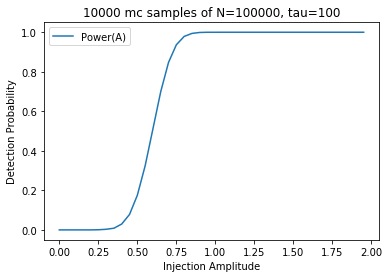

In [91]:
from scipy.interpolate import InterpolatedUnivariateSpline as spline
desired_pwr = 0.5
# again, let's run on cluster and import data from files
N = 10**5
Nmc = 10**4
plot_amps = np.genfromtxt('amps_pwrA_10k5.csv', delimiter=',') #Avals
plot_pwrs = np.genfromtxt('pwrA_10k5.csv', delimiter=',') #counts
# we find that for P(A > 1) = 1, which makes sense b/c leading order is A^2
namps = np.size(plot_amps)
plot_amps = plot_amps[:namps//2]
plot_pwrs = plot_pwrs[:namps//2]
# interpolate Pi(A) and find zero of Pi(A) - desired_pwr
amp_for_desired_pwr = spline(plot_amps, plot_pwrs - desired_pwr).roots()
print('\nfor power = ', desired_pwr, '\nneed amplitude = ', amp_for_desired_pwr, '\n')
plt.figure(655)
plt.plot(plot_amps, plot_pwrs)
plt.legend(['Power(A)'])
plt.xlabel('Injection Amplitude')
plt.ylabel('Detection Probability')
#plt.title(str(Nmc) + ' mc samples of N=' + str(N) + ', tau=' + str(tau))
plt.title(str(Nmc) + ' mc samples of N=' + str(N) + ', tau=' + str(tau))
plt.show(block=False)


for power =  0.5 
need amplitude =  [0.63280995] 



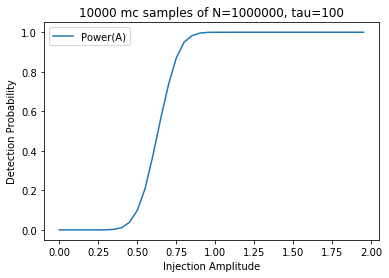

In [14]:
from scipy.interpolate import InterpolatedUnivariateSpline as spline
desired_pwr = 0.5
# and for N = 10^6
N = 10**6
Nmc = 10**4
plot_amps = np.genfromtxt('amps_pwrA_10k6.csv', delimiter=',') #Avals
plot_pwrs = np.genfromtxt('pwrA_10k6.csv', delimiter=',') #counts
# we find that for P(A > 1) = 1
namps = np.size(plot_amps)
plot_amps = plot_amps[:namps//2]
plot_pwrs = plot_pwrs[:namps//2]
# interpolate Pi(A) and find zero of Pi(A) - desired_pwr
amp_for_desired_pwr = spline(plot_amps, plot_pwrs - desired_pwr).roots()
print('\nfor power = ', desired_pwr, '\nneed amplitude = ', amp_for_desired_pwr, '\n')
plt.figure(656)
plt.plot(plot_amps, plot_pwrs)
plt.legend(['Power(A)'])
plt.xlabel('Injection Amplitude')
plt.ylabel('Detection Probability')
#plt.title(str(Nmc) + ' mc samples of N=' + str(N) + ', tau=' + str(tau))
plt.title(str(Nmc) + ' mc samples of N=' + str(N) + ', tau=' + str(tau))
plt.show(block=False)

********
g) $\textbf{What would you do if the size of the box is unknown,}$

$\textbf{and can take any width between 2 bins and 500 bins?}$

$\textbf{Use monte-carlo to set the bar. What is the equivalent look-elsewhere-effect?}$ 
********

if the width of the box $\tau$ is unknown, we can compute $z_{n_s}(\tau)$ for each $\tau \in [2, 500]$

then we must answer two questions: what is the new form of the hypothesis test? and how do we compute the relevant statistics?

to answer the first question, we must recognize the difference between scanning over ranges of $\tau$ and $n_s$: when we scan over $n_s$ we are looking for the same signal at different times, whereas when we scan over $\tau$ we are looking for qualitatively different signals

thus, it doesn't make sense to form the detection problem as a single hypothesis about the existence of some unspecified signal, but rather each value of $\tau$ should have its own hypothesis about the existence of a signal with that shape, which means that a different detection bar should be set for each value of $\tau$

this means that we are no longer looking for a scalar cutoff in a 1d space, but rather a curve $\eta(\tau)$ such that only a fraction $\alpha$ of the points lie above it, and there will be freedom in how we draw this curve -- in this simple case where we have no priors about pulse width, we can achieve this by using a single detection bar but computing a different test statistic for each width $\tau$: the normalized $ \frac{\lambda(\tau; x)}{\tau} = max_{n_s} \frac{|z(\tau, n_s; x)|^2}{\tau} $ 

as for the question of how to compute these test statistics efficiently, there is undoubtedly a way to leverage the fact that $z(\tau, n_s; x)$ at larger values of $\tau$ is the sum of statistics at smaller $\tau$ and different $n_s$, e.g., $ z(100, 0; x) = z(50, 0; x) + z(50, 50; x) $

in fact, we can construct $z(\tau, n_s; x)$ for $ \tau = 4, 5, ..., 500 $ using only $ \tau = 2, 3 $ but for the sake of simplicity we will take the brute force approach

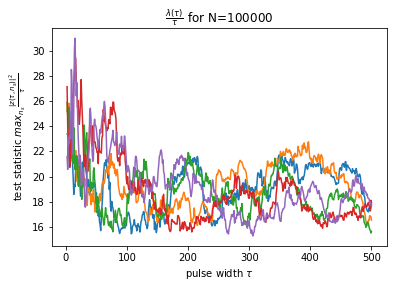

In [14]:
# let's just see what lambda / tau looks like as a function of tau for a few samples
N = 10**5
taus = np.arange(2, 501)
Nt = np.size(taus)
alpha = 0.0001
nsamples = 5#10 / alpha:
ft_signals = np.empty((Nt, N), dtype=np.csingle)
for j, tt in enumerate(taus):
    ft_signals[j] = np.fft.fft(np.concatenate([np.zeros(N-tt), np.ones(tt)]))
max_tau_stats = np.empty(nsamples)
tau_stats = np.empty(Nt)
plt.figure(987)
plt.title('$\\frac{\lambda(\\tau)}{\\tau}$ for N=' + str(N))
plt.xlabel('pulse width $\\tau$')
plt.ylabel('test statistic $max_{n_s} \\frac{|z(\\tau, n_s)|^2}{\\tau}$')
for i in np.arange(nsamples):
    ft_noise = np.fft.fft(np.random.normal(0, 1, N) + \
                          1j*np.random.normal(0, 1, N))
    for j in np.arange(Nt):
        tau_stats[j] = max(abs2(np.fft.ifft(ft_signals[j] * ft_noise))) / float(taus[j])
    max_tau_stats[i] = max(tau_stats)
    plt.plot(taus, tau_stats)
plt.show(block=False)

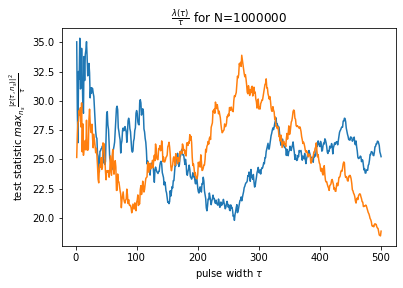

In [15]:
# and again for the dreaded N = 10^6
N = 10**6
taus = np.arange(2, 501)
Nt = np.size(taus)
alpha = 0.0001
nsamples = 2#10 / alpha:
ft_signals = np.empty((Nt, N), dtype=np.csingle)
for j, tt in enumerate(taus):
    ft_signals[j] = np.fft.fft(np.concatenate([np.zeros(N-tt), np.ones(tt)]))
max_tau_stats = np.empty(nsamples)
tau_stats = np.empty(Nt)
plt.figure(989)
plt.title('$\\frac{\lambda(\\tau)}{\\tau}$ for N=' + str(N))
plt.xlabel('pulse width $\\tau$')
plt.ylabel('test statistic $max_{n_s} \\frac{|z(\\tau, n_s)|^2}{\\tau}$')
for i in np.arange(nsamples):
    ft_noise = np.fft.fft(np.random.normal(0, 1, N) + \
                          1j*np.random.normal(0, 1, N))
    for j in np.arange(Nt):
        tau_stats[j] = max(abs2(np.fft.ifft(ft_signals[j] * ft_noise))) / float(taus[j])
    max_tau_stats[i] = max(tau_stats)
    plt.plot(taus, tau_stats)
plt.show(block=False)

In [2]:
# plot histogram of monte carlo samples 
def mc_hist_alltau(stats, N=1000000, alpha=0.0001, nsamples=100000):
    plt.hist(stats, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.xlabel('$max_{n_s, \\tau}|z_0|^2$')
    plt.ylabel('count')
    plt.title(str(nsamples) + ' MC samples with $N=$' + str(N) + \
              ', $2 \\leq \\tau \\leq 500$, $\\alpha=$' + str(alpha))
    plt.show(block=False)
    return

# get monte carlo samples of test statistics from file and analyze
def get_stats_file_alltau(filename, N=1000000, alpha=0.0001):
    taustats = np.genfromtxt(filename, delimiter=',')
    bartau = np.quantile(taustats, 1 - alpha)
    alphatau = np.exp(-bartau / 2.0)
    lef_Ntau = alphatau / alpha
    Nmc = np.size(taustats)
    print(str(Nmc), ' samples of N=', str(N), ', alpha=', \
          str(alpha), '\n[bar, alpha_prime, lef_N] = \n', [bartau, alphatau, lef_Ntau])
    mc_hist_alltau(taustats, N=N, alpha=alpha, nsamples=Nmc)
    return taustats

100000  samples of N= 100000 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [47.117469083945274, 5.869101061444592e-11, 5.869101061444592e-07]


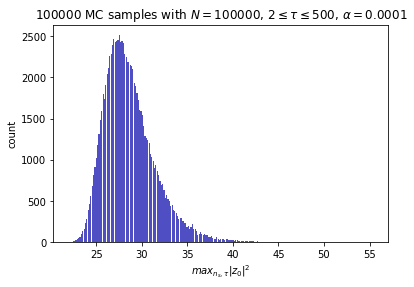

In [15]:
# now this data is surely too much for a laptop on reasonable time scale
taustats5 = get_stats_file_alltau('max10e5t2_500stats_100k.csv', N=100000, alpha=0.0001)

27000  samples of N= 1000000 , alpha= 0.0001 
[bar, alpha_prime, lef_N] = 
 [49.90552653109057, 1.4559706001838626e-11, 1.4559706001838626e-07]


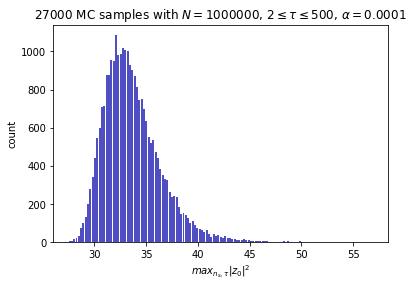

In [16]:
# this data takes > 1 day on the cluster even when done in parallel batches of 1000
taustats6 = get_stats_file_alltau('max10e6t2_500stats_27k.csv', N=1000000, alpha=0.0001)

so it seems that searching all $499$ values of $\tau$ increases the effective number of independent samples by factors of roughly $100$ for $N = 10^5$ and $50$ for $N = 10^6$ 

********
2) You are looking for the same box as in (1), but suppose that the noise is of the following form:
n(t) = np.random.normal(0,1,$10^6$) convolved with a normalized triangular shape of width 500 [normalized such that np.linalg.norm(triangle)=1].
********

In [5]:
# these jit wrappers do seems to shave a bit of computation time
@jit(nopython=True)
def Mv(mat, vec):
    return mat.dot(vec)

@jit(nopython=True)
def vdot(vec1, vec2):
    return np.dot(vec1,vec2)

@jit(nopython=True)
def Minv(mat):
    if np.linalg.matrix_rank(mat) < (mat[0]).size:
        print('ERROR: matrix is singular')
        return None
    else:
        return np.linalg.inv(mat)

@jit(nopython=True)
def Mtrans(mat):
    return np.transpose(mat)

@jit(nopython=True)
def unitv(vec):
    return vec / np.linalg.norm(vec)

# right angle b/w base and left side? (I think this is a "sawtooth" pulse)
@jit(nopython=True)
def get_tri_right(arr_size, tri_width):
    tri_r = np.zeros(arr_size)
    for j in np.arange(tri_width):
        tri_r[j] = tri_width - j
    return tri_r / np.linalg.norm(tri_r)

# or right angle b/w left and right sides? (this one is definitely called "triangular")
# but will use the former b/c this never seems to have invertible convolution matrix 
@jit(nopython=True)
def get_tri_iso(arr_size, tri_width):
    tri_i = np.zeros(arr_size)
    iso_height = int(tri_width / 2)
    tri_i[iso_height] = iso_height
    for j in np.arange(iso_height):
        tri_i[iso_height - j] = iso_height - j
        tri_i[iso_height + j] = iso_height - j
    return tri_i / np.linalg.norm(tri_i)

# get convolution matrix T w/periodic summation convention (should be consistent w/fft)
# and using the upright isosceles triangle as our "triangular pulse"
@jit(nopython=True)
def get_tmat(arr_size, tri_width):
    vec = get_tri_right(arr_size, tri_width)
    mat = np.empty((arr_size, arr_size))
    mat[:,0] = vec
    for j in np.arange(1, arr_size):
        mat[:j,j] = vec[-j:]
        mat[j:,j] = vec[:arr_size-j]
    return mat

# this gives M = (T^{-1})^{T} T^{-1}
# using np.matmul (no numba support) faster than jit with np.dot
def get_mmat(arr_size, tri_width):
    mat = Minv(get_tmat(arr_size, tri_width))
    return np.matmul(np.transpose(mat), mat)

# get unit height rectangular pulse signal
@jit(nopython=True)
def get_signal(arr_size, sig_width, start=0):
    return np.concatenate((np.zeros(start), np.ones(sig_width), \
                           np.zeros(arr_size - sig_width - start)))

# get M.signal = (T^{-1})^{T} T^{-1} \hat{s}
@jit(nopython=True)
def get_tstat_svec(arr_size, tri_width, sigvec):
    mat = np.linalg.inv(get_tmat(arr_size, tri_width))
    return np.dot(np.transpose(mat), mat.dot(sigvec))


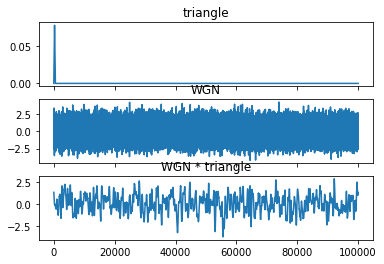

In [93]:
# let's see what this convolved noise looks like
N = 10**5
triangle_width = 500
tri = get_tri_right(N, triangle_width)
old_noise = np.random.normal(0, 1, N)
new_noise = np.fft.irfft(np.fft.rfft(tri) * np.fft.rfft(old_noise))
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
ax[0].set_title('triangle')
ax[0].plot(np.arange(N), tri)
ax[1].set_title('WGN')
ax[1].plot(np.arange(N), old_noise)
ax[2].set_title('WGN * triangle')
ax[2].plot(np.arange(N), new_noise)

plt.show(block=False)

In [95]:
# check that norm'd test stat is standard gaussian under H_0
nnn = 1000
testwidth = int(nnn/100)
testsigwidth = int(testwidth/2)
testsss = unitv(get_tstat_svec(nnn, testwidth, get_signal(nnn, testsigwidth)))
test_stats = np.zeros(10)
for i in np.arange(10):
    test_stats[i] = vdot(testsss, np.random.normal(0,1,nnn))
print(test_stats)

[ 0.66321968  0.60670059  0.32677077 -1.2804982  -1.46893889  0.45494444
 -1.47822933  1.68481086 -1.30033402 -0.36582514]


In [9]:
# check that fft and direct sum give same answers for case w/o convolution matrix
nnn = 1000
testwidth = int(nnn/100)
testsigwidth = int(testwidth/2)
testdata = np.random.normal(0,1,nnn)
ns0sig = np.concatenate((np.ones(testsigwidth), np.zeros(nnn-testsigwidth)))
revsig = np.concatenate((np.zeros(nnn-testsigwidth), np.ones(testsigwidth)))
testzdot = vdot(ns0sig, testdata)
testzfft = np.fft.irfft(np.fft.rfft(revsig) * np.fft.rfft(testdata))

In [107]:
min(abs(testzdot - testzfft))

1.5543122344752192e-15

In [10]:
[testzdot, testzfft[-1], testzfft[0], testzfft[1]]

[-0.5538588580111101,
 -0.5538588580111107,
 -1.1820574978963077,
 -0.7601704926149789]

In [12]:
nnn = 1000
testwidth = int(nnn/100)
testsigwidth = int(testwidth/2)
testdata = np.random.normal(0,1,nnn)
ns0sig = np.concatenate((np.ones(testsigwidth), np.zeros(nnn-testsigwidth)))
revsig = np.concatenate((np.ones(1), np.zeros(nnn-testsigwidth), np.ones(testsigwidth-1)))
testzdot = vdot(ns0sig, testdata)
testzfft = np.fft.irfft(np.fft.rfft(revsig) * np.fft.rfft(testdata))

In [13]:
[testzdot, testzfft[-1], testzfft[0], testzfft[1]]

[-0.905104490611863,
 -0.7869573538130757,
 -0.905104490611864,
 -1.152259428573302]

In [7]:
# check that fft and direct sum give same answers for case w/ convolution matrix
nnn = 10000
testwidth = 50
testsigwidth = 10
testdata = np.random.normal(0,1,nnn)
ns0sig = np.concatenate((np.ones(testsigwidth), np.zeros(nnn-testsigwidth)))
revsig = np.concatenate((np.zeros(nnn-testsigwidth), np.ones(testsigwidth)))
testmmat = get_mmat(nnn, testwidth)
testzdot = vdot(ns0sig, testmmat.dot(testdata))
testzfft = np.fft.irfft(np.fft.rfft(revsig) * np.fft.rfft(testmmat.dot(testdata)))

In [8]:
min(abs(testzdot - testzfft))

8.659739592076221e-14

In [ ]:
# what about fourier space?
nnn = 10000
testwidth = 50
testsigwidth = 10
tri_ft = np.fft.rfft(get_tri_right(N, triangle_width))

********
a) Write a statistical model for the null (H0) and the alternative hypothesis (H1) in real space what is the Neyman-Pearson detection statistic you would compute? [use matrix notation]
********

we have a time series of $ N = 10^6 $ data points $ x_n, n = 0, 1, ..., N-1 $ 

the null hypothesis is that the data is white gaussian noise (WGN) $ w_n \sim N(0,1) $ convolved with a normalized triangular pulse $t_n(\tau_{tri})$ of base width $\tau_{tri}$, giving the noise vector

$ n_n(\tau_{tri}) = w_n * t_n(\tau_{tri}) = \sum_{n'} w_{n'} t_{n - n'}(\tau_{tri}) = F^{-1}[F[w_n]_k F[t_n(\tau_{tri})]_k]_n $

using the matrix notation $ T_{n \, n'} \equiv t_{n - n'}(\tau_{tri}) $, we can write the noise as

$ n_n = \sum_{n'} T_{n \, n'} w_n \equiv (T w)_n $

the alternative hypothesis is that, in addition to this noise, the data contains a rectangular pulse of height $A$ and length $\tau$ starting at time $n_s$ (signal): 

$ s_n = A Indicator[n_s \leq n < n_s + \tau]_n \equiv A \hat{s}_n(\tau, n_s) $

we first write these hypotheses as

$ H_0: x_n = (T w)_n $

$ H_1(A, \tau, n_s): x_n = (T w)_n + A \hat{s}_n(\tau, n_s) $

and to compute the likelihoods $ L[H|x] = P[x|H] = P[H|x] \frac{P[x]}{P[H]} $ we rewrite this as 

$ H_0: w_n = (T^{-1} x)_n $

$ H_1(A, \tau, n_s): w_n = (T^{-1} x)_n + A (T^{-1} \hat{s}(\tau, n_s))_n $

so that we can use the gaussian probability to get

$ P[x|H_0] = (2 \pi)^{-\frac{N}{2}} e^{-\frac{1}{2} (T^{-1} x)^T T^{-1} x} $

$ P[x|H_1(A, \tau, n_s)] = (2 \pi)^{-\frac{N}{2}} e^{-\frac{1}{2} (T^{-1} x + T^{-1} s)^T (T^{-1} x + T^{-1} s)} $

then defining $ M(\tau_{tri}) \equiv (T^{-1})^T T^{-1} $ and 

$ s_{tri}(\tau, n_s, \tau_{tri}) \equiv T^{-1} \hat{s} $ 

we get

$ \Lambda(A, \tau, n_s, \tau_{tri}; x) = e^{-\frac{1}{2} A^2 \hat{s}^T M \hat{s}} e^{A \hat{s}^T M x} = e^{-\frac{1}{2} A^2 |s_{tri}|^2} e^{A s_{tri}^T T^{-1} x} $

from which we choose the neyman-pearson test statistic

$ \lambda(\tau, n_s, \tau_{tri}; x) \equiv \frac{1}{A} \ln(\Lambda) + \frac{A}{2} |T^{-1} \hat{s}|^2 = ((T^{-1})^T s_{tri})^T x $

or 

$ \lambda(\tau, n_s, \tau_{tri}; x) = \hat{s}(\tau, n_s)^T M(\tau_{tri}) x = s_{tri}^T(\tau, n_s, \tau_{tri}) T^{-1}(\tau_{tri}) x $

then we reject $H_0$ in favor of $H_1$ when

$ \lambda(\tau, n_s, \tau_{tri}; x) > \eta_{\lambda} $

where the threshold (detection bar) $\eta_{\lambda}(\alpha)$ is set by the requirement that

$ P[\lambda(\tau, n_s, \tau_{tri}; x) > \eta_{\lambda} | H_0] = P[\lambda(\tau, n_s, \tau_{tri}; x = T w) > \eta_{\Lambda}] = P[s_{tri}^T(\tau, n_s, \tau_{tri}) w > \eta_{\Lambda}(\alpha)] = \alpha $

for our desired significance level (false detection rate) $\alpha$

then we note that $ (s_{tri})_n w_n $ is a gaussian with variance $ (s_{tri})_n^2 $, so $ s_{tri}^T(\tau, n_s, \tau_{tri}) w $ is a gaussian with variance $ |s_{tri}|^2 $ and $ \frac{s_{tri}^T}{|s_{tri}|} w $ is a standard gaussian, giving

$ \alpha  = P[\frac{s_{tri}^T}{|s_{tri}|} w > \frac{\eta_{\lambda}(\alpha)}{|s_{tri}|}] = 1 - \Phi(\frac{\eta_{\lambda}(\alpha)}{|s_{tri}(\tau, n_s, \tau_{tri})|}) $

where $\Phi(z)$ is the standard gaussian CDF

********
b) Write a statistical model for the null (H0) and the alternative hypothesis (H1)  in Fourier space. what is the Neyman-Pearson detection statistic you would compute? Is it the same statistic? Simulate a signal and compute the score in several positions, both in real space and Fourier space, make sure you get the same number up to machine precision.
********

now letting $ \tilde{v}_k \equiv F[v_n]_k = (U v)_k $, where $U$ is the unitary DFT matrix with adjoint $ U^{\dagger} = U^{-1} $, and defining the fourier basis matrix $ \tilde{M} \equiv U M U^{\dagger} $, we have the hypotheses

$ H_0: \tilde{x}_k = \tilde{(T w)}_k = (U T U^{\dagger} U w)_k = (\tilde{T}(\tau_{tri}) \tilde{w})_k $

$ H_1(A, \tau, n_s): \tilde{x}_k = (\tilde{T}(\tau_{tri}) \tilde{w})_k + \tilde{s}_k(\tau, n_s) $


********
c) Are you more sensitive with this noise source, or in Q1? What is the amplitude of the box such that if we "inject" a signal with this amplitude, the detection probability is 50% [what about 10%, 99%, 99.99%]?
********

********
(d) about the 50% detection amplitude as a function of the Triangle's width. Can you compute it analytically? (good approximation is OK) 
********

********
3) You are looking for the same box as in (1), but suppose that the noise is of the following form:
n(t) = np.random.normal(0,1,10**6) convolved with a normalized filter of width 500 and unknown shape [normalized such that np.linalg.norm(filter)=1].
********

********
a) Is it possible to obtain a good estimator of the filter? [Read about the Welch method AFTER trying to solve it yourself]
********

********
b) What is the impact of using the best-estimate filter in the detection statistic computed in (2) ? Is this hampering detection at all?
********

********
c) Suppose instead of $10^6$ samples, you have only $10^4$ samples, how does this impact the precision of estimating the filter?  Is this hampering detection at all?
********

********
4) Suppose you have the same situation as in (2), but after generating the noise, Gargamel chooses at random 10**3 samples and zeroizes them.
********

********
a) Compute the statistic from (2) in this situation, and plot their histogram. Is that the same histogram as in (2)? Would this interfere with detection?
********

********
b) Write the time-domain statistic relevant for detecting a signal at a particular place, taking the missing data into account.
********